# Betting the Draw

In [351]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import seaborn as se
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
se.set()

The purpose of this notebook is to investagate simple betting strategies based on the odds given to the tree possible outcomes of a soccer match; Win, Loss and Draw.





Currently using five year of matches from 16 Major Soccer Leagues

These Leagues were choosen under the assumption that they have many similarities and so they should follow the same patterns

All match information comes from www.betexplorer.com

In [352]:
# Reading in each file using glob to match the pattern they all follow
# fn = "*/*_20*_Pvals.csv"
# all_files = glob.glob(fn)
# li = []

# for filename in all_files:
#     temp = pd.read_csv(filename, index_col=None, header=0)
#     temp['league'] = filename[:filename.find('/')]
#     li.append(temp)
    
    
# df = pd.concat(li, axis=0, ignore_index=True)
df = pd.read_csv("historical_odds.csv")
df.Date = pd.to_datetime(df.Date)
df.index = df.Date

In [353]:
def draws(df):
    x = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    xi = [8,9,10,11,12,1,2,3,4,5]
    y = []
    for i in xi:
        temp = df[df.index.month==i]
        num_matches = temp.shape[0]
        num_draws = temp[temp.OutCome==0].shape[0]
        if(num_matches!=0):
            y.append(num_draws/num_matches)
        else:
            y.append(0)
    return x, y

#Use this function to check a stragy by each year in the data frame
def returnByYear(df,option):
    d1 = {'h':1,'d':0,'a':-1}
    d2 = {'h':'HOdds','d':'DOdds','a':'AOdds'}
    years = np.sort(df.index.year.value_counts().index)
    returnPerYear = []
    matchesPerYear = []
    for i in years:
        m = df[(df.index.year==i)].shape[0]
        r = sum(df[(df.index.year==i)&(df.OutCome==d1[option])][d2[option]])
        returnPerYear.append((r-m)/m)
        matchesPerYear.append(m)
    return years,returnPerYear,matchesPerYear

## Betting the Draw

It is very frustrating when your bet on a three-way moneyline ends in a draw especially  some weeks it seems that it is happening so often that you would have acttualy made money if only you had only bet on the draw. 

Using the Data I have made sevral hypotises and then made a timeseries plot to investagate how the time of year affects the draws in each hypotises. 



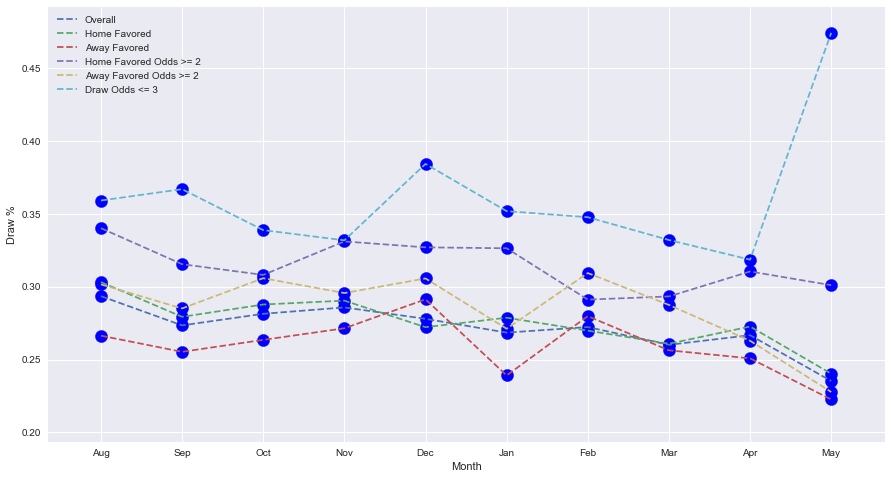

In [354]:
fig, ax = plt.subplots()
# Plot Every Year
x_t, y_t = draws(df)
ax.scatter(x_t,y_t,s=150,c='b')
ax.plot(x_t,y_t,"--",label="Overall")

mask_1 = ((df.HOdds <= df.AOdds))
x_m1, y_m1 = draws(df[mask_1])
ax.scatter(x_m1,y_m1,s=150,c='b')
ax.plot(x_m1,y_m1,"--",label="Home Favored")
#
mask_2 = ((df.HOdds >= df.AOdds))
x_m2, y_m2 = draws(df[mask_2])
ax.scatter(x_m2,y_m2,s=150,c='b')
ax.plot(x_m2,y_m2,"--",label="Away Favored")
#
mask_3 = ((df.HOdds <= df.AOdds)&(df.HOdds >= 2))
x_m3, y_m3 = draws(df[mask_3])
ax.scatter(x_m3,y_m3,s=150,c='b')
ax.plot(x_m3,y_m3,"--",label="Home Favored Odds >= 2")

mask_4 = ((df.HOdds >= df.AOdds)&(df.AOdds >= 2))
x_m4, y_m4 = draws(df[mask_4])
ax.scatter(x_m4,y_m4,s=150,c='b')
ax.plot(x_m4,y_m4,"--",label="Away Favored Odds >= 2")

mask_5 = (df.DOdds <= 3)
x_m5, y_m5 = draws(df[mask_5])
ax.scatter(x_m5,y_m5,s=150,c='b')
ax.plot(x_m5,y_m5,"--",label="Draw Odds <= 3")
#
fig.set_figheight(8)
fig.set_figwidth(15)
ax.set_ylabel("Draw %")
ax.set_xlabel("Month")
ax.legend()


Veiw Returns by each month

In [341]:
month = 12 
masks = [mask_1,mask_2,mask_3,mask_4,mask_5]
label = ["Home Favored",
         "Away Favored","Home Favored Odds >= 2",
         "Away Favored Odds >= 2",
        "Draw Odds <= 2.9"]


print("%-25s %7s %15s"%("Category","Games","ROI"))
print('-' * 52)
dec = df[df.index.month==month]
if dec.shape[0] != 0:
    games = dec.shape[0]
    roi = (sum(dec[dec.OutCome==0].DOdds) - games)/games
    print("%-25s %7i %15.4f"%("All",games,roi))
else:
    print("%21s"%("No Games"))
for i in range(len(masks)):
    dec = df[masks[i]][df[masks[i]].index.month==month]
    if dec.shape[0] != 0:
        games = dec.shape[0]
        roi = (sum(dec[dec.OutCome==0].DOdds) - games)/games
        print("%-25s %7i %15.4f"%(label[i],games,roi))
    else:
        print("%21s"%("No Games"))
print('-' * 52)

Category                    Games             ROI
----------------------------------------------------
All                          2666         -0.0302
Home Favored                 1958         -0.0502
Away Favored                  714          0.0165
Home Favored Odds >= 2        948          0.0377
Away Favored Odds >= 2        458         -0.0180
Draw Odds <= 2.9              229          0.1262
----------------------------------------------------


This Plot is used to check to make sure that a winning stratagy is consistant year by year.

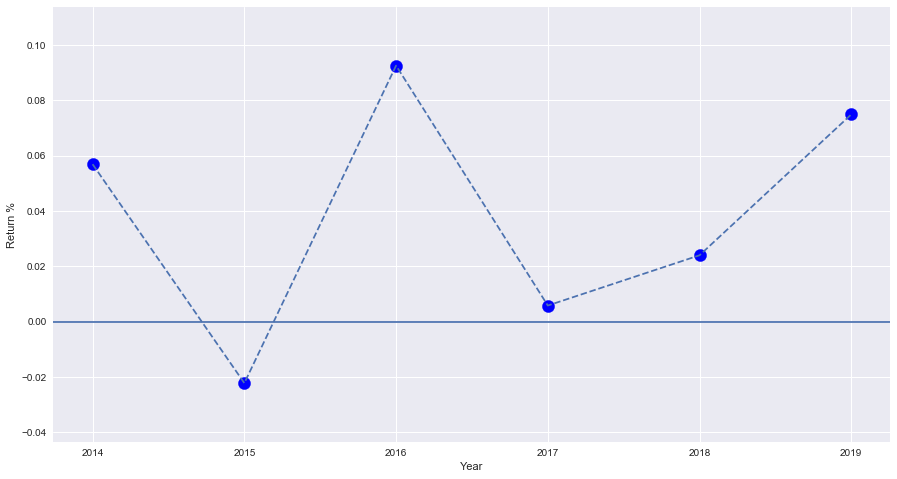

In [342]:
years,returnPerYear,matchesPerYear = returnByYear(df[mask_5],'d')
fig, ax = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(15)

ax.scatter(years,returnPerYear,s=150,c='b')
ax.plot(years,returnPerYear,"--",label="Overall")
ax.set_ylabel("Return %")
ax.set_xlabel("Year")
ax.axhline(y=0)

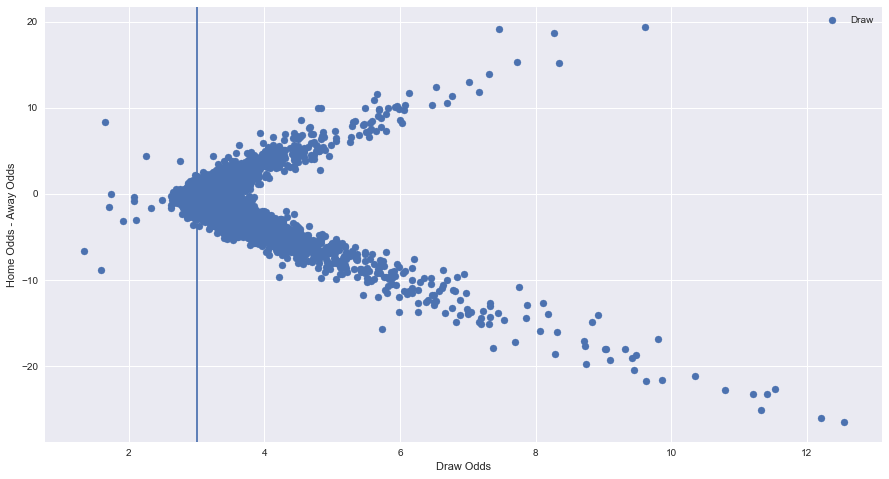

In [343]:
fig, ax = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(15)

#Game ends in a draw
x_1=df[df.OutCome==0].DOdds
y_1=(df[df.OutCome==0].HOdds - df[df.OutCome==0].AOdds)
ax.scatter(x=x_1,y=y_1,label="Draw")

# # Home Team wins
# x_2=df[df.OutCome==1].DOdds
# y_2=(df[df.OutCome==1].HOdds - df[df.OutCome==1].AOdds)
# ax.scatter(x=x_2,y=y_2,label="Home")

# # Away Team wins
# x_3=df[df.OutCome==-1].DOdds
# y_3=(df[df.OutCome==-1].HOdds - df[df.OutCome==-1].AOdds)
# ax.scatter(x=x_3,y=y_3,label="Away")


ax.set_ylabel("Home Odds - Away Odds")
ax.set_xlabel("Draw Odds")

# ax.set_xlim(2.7,2.9)
# ax.set_ylim(-1,1)
ax.legend()
ax.axvline(x=3)

Year  #Matches     ROI
--------------------------
|2014  |  195 |    0.0587|
|2015  |  408 |   -0.0155|
|2016  |  401 |    0.1188|
|2017  |  335 |    0.0107|
|2018  |  241 |    0.0263|
|2019  |  194 |    0.1057|
--------------------------
Total: 0.0469


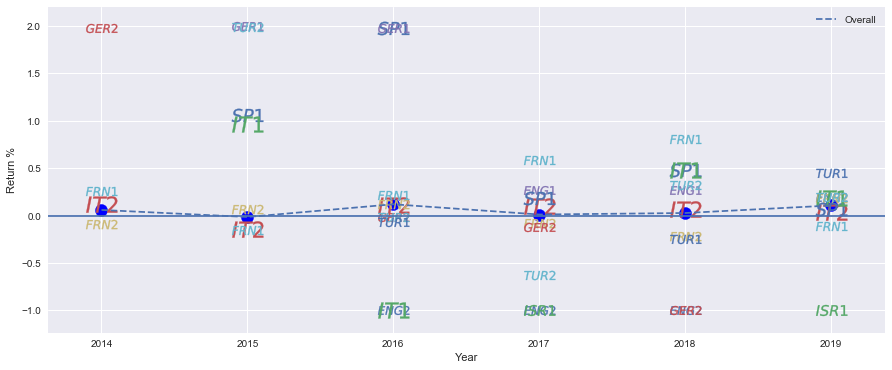

In [344]:
max_odds = 3 #<<<< Just Enter Max Odds
mask = (df.DOdds <= max_odds)&(df.League != "SP2")
region = df[mask]
roi = (sum(region[region.OutCome==0].DOdds)-region.shape[0])/region.shape[0]

years,returnPerYear,matchesPerYear = returnByYear(region,'d')
fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(15)

ax.scatter(years,returnPerYear,s=150,c='b')
ax.plot(years,returnPerYear,"--",label="Overall")
ax.set_ylabel("Return %")
ax.set_xlabel("Year")

Leagues = df.League.value_counts().index
leagues_by_year = []
for League in Leagues:
    years_i,returnPerYear_i,matchesPerYear_i = returnByYear(region[region.League==League],'d')
    ax.scatter(years_i,returnPerYear_i,s=1000,marker=("$"+League+"$"))
    ax.set_ylabel("Return %")
    ax.set_xlabel("Year")
    #leagues_by_year.append([League, (np.mean(returnPerYear_i))])


ax.legend()
ax.axhline(y=0)

#
print("%-5s %7s %7s"%("Year","#Matches","ROI"))
print('-' * 26)
for i in range(len(years)):
    print("|%-5i |%5i |%10.4f|"%(years[i], matchesPerYear[i], returnPerYear[i]))
print('-' * 26)
print(("Total: %.4f")%roi)





$c; \mathbb{P}(\text{winning}) \qquad m$; matches played $\qquad w = floor(cm)$ $\qquad \bar\phi = \sum{o_i}$ $\qquad R$; return

$$R = \frac{(\bar\phi w) - m}{m}$$

Break Even: $\quad R = 0 \quad \text{when} \quad (\bar\phi w) = m$ 

Making Money when $R > 0 \quad \text{when} \quad \bar\phi > \frac{m}{w}$ 


What happens when the number of matches bet gets large?

$\lim_{m \to \infty} \frac{m}{w} = \lim_{m \to \infty} \frac{m}{floor(cw)} \approx \frac{1}{c}$

Finaly a way to check weather a betting range is profitable  is to check if $\bar\phi > 1 \big/ c$

Text(0.5,0,'# Matches')

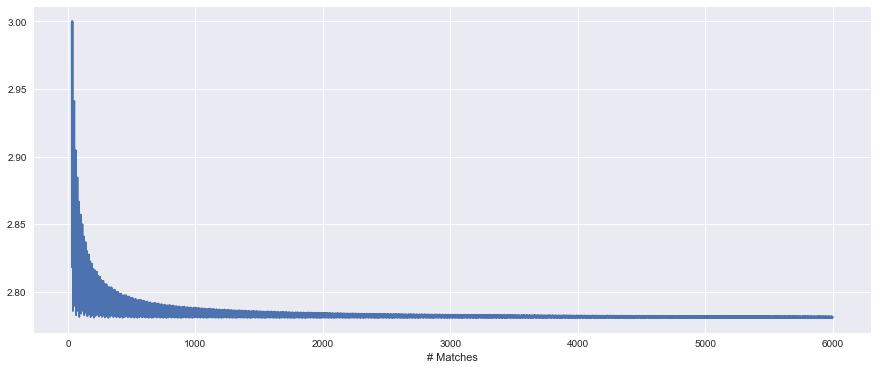

In [334]:
o = np.mean(region.DOdds)
m = [i for i in range(30,6000)]
p = sum(region.OutCome==0)/region.shape[0]
R = [((i)/(np.floor(i*p))) for i in m]



fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(15)

ax.plot(m,R)

# ax.set_xlim(30,100)
# ax.set_ylim(2.625,2.675)

# ax.axhline(y=2.65)
# ax.axhline(y=2.63)

ax.set_xlabel("# Matches")
#ax.set_ylabel("$\frac{1}{c}$")


The Mean of The Samples:  2.7430631417959366 
AVG Betting Odds:  2.9145885005636685


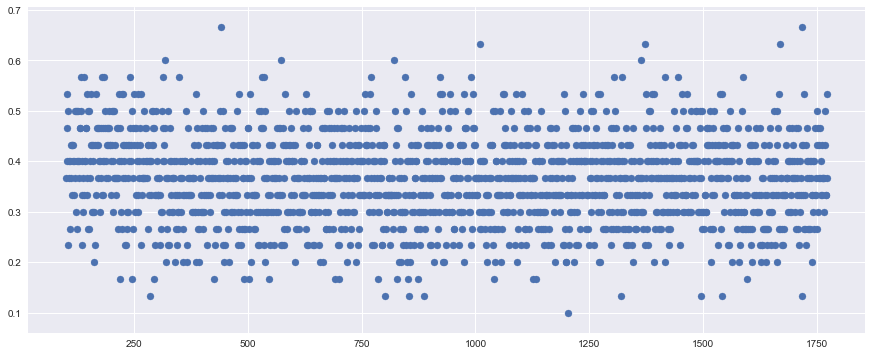

In [345]:
n = range(100,region.shape[0])
c =[]

for i in range(100,region.shape[0]):
    ci = (sum(np.random.choice(region[0:i].OutCome,30) == 0)/30)
    c.append(ci)
    
fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(15)

ax.scatter(n,c)

print("The Mean of The Samples: ",1/np.mean(c),
     "\nAVG Betting Odds: ", region.DOdds.mean())

#### Kelly betting 

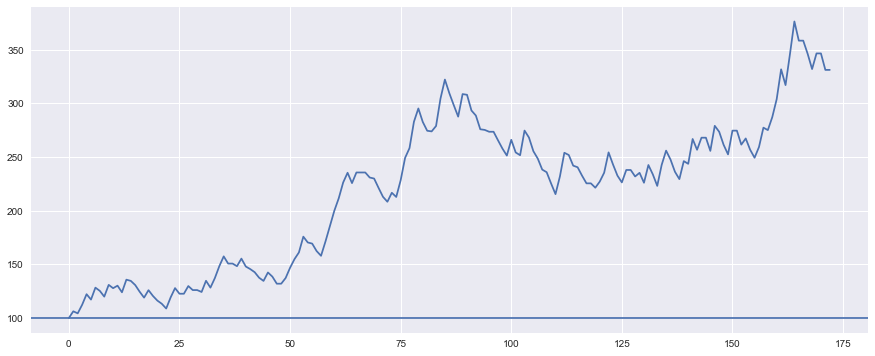

In [348]:
################################################
## Updating win probability evey n matches    ##
## first test n = 30                          ##
################################################
BankRoll = 100
BRi = [100]

region = region[region.index.month!=4]
region = region[region.index.month!=9]
region = region[region.index.month!=10]
region = region.sort_index()
odds = region.DOdds.values - 1
outcome = region.OutCome.values
League = region.League
year = region.index.year
month = region.index.month

n = 1000
c =sum(region[0:n].OutCome == 0)/n

ps = [1/c] 
ao = np.mean(region[0:n].DOdds) 
aOs = [np.mean(region[0:n].DOdds)] 
data = []

for i in range(n,len(odds)):
    if (i+1)%n == 0:
        c =sum(region[(i+1)-n:(i+1)].OutCome == 0)/n
    bet=0
#     if((odds[i]+1) > 1/c):
    kelly = (c*(odds[i] + 1) - 1)/odds[i]
    if(kelly>0):
        bet = BankRoll*kelly
        BankRoll-=bet
        wl=0
        if(outcome[i]==0):
            BankRoll+= bet*odds[i] + bet
            wl=1
        #make a data set!!
        # bet index, delta bankroll, bankroll
    data.append([year[i], month[i], League[i], bet, BankRoll, ao,odds[i]+1, 1/c,wl])
    BRi.append(BankRoll)
################################################
##                                            ##
##                                            ##
################################################ 

x = range(0,len(BRi))

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(15)

# ax.plot(x,BRi)
ax.plot(x,BRi)
ax.axhline(y=100)

header=["Y","M","League","Bet","Bank","AVG_Odds","Odds","Threshold","WL"]
data = pd.DataFrame(data,columns=header)